In [3]:
import uproot
import numpy as np

import matplotlib.pyplot as plt

import zfit
import math
import scipy
import matplotlib

from hepstats.hypotests.calculators import AsymptoticCalculator
from hepstats.hypotests.parameters  import POIarray, POI

/Users/romoluque_c/anaconda3/lib/python3.10/site-packages/zfit/__init__.py:59: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(
/Users/romoluque_c/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
cols = ['#CCCCCC', '#07A9FF', '#1A2A5B', '#FF9E21', '#149A9A', 'indianred', '#66283A', '#8A1859', '#BFC2C7',
        '#FFB0A8', '#B580CA', '#203769', '#909090', '#909090', '#83C369', '#FDED95', '#85F7C2', '#105D20',
        '#E77D4D', '#9D0008', '#EDDAB7', '#DCDCDC', '#DCDCDC', '#393939']

In [5]:
def find_zero_crossing(x, y):
    """
    Find the zero crossings of the spline interpolated function of y with respect to x.
    """
    tck = scipy.interpolate.splrep(x, y, s=0)
    return scipy.interpolate.sproot(tck)

def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if exponent is None:
        exponent = int(math.floor(math.log10(abs(num))))
    coeff = round(num / float(10 ** exponent), decimal_digits)
    if precision is None:
        precision = decimal_digits

    return r"{0:.{2}f}$\cdot$10$^{{{1:d}}}$".format(coeff, exponent, precision)

def set_border_line_width(ax: matplotlib.axes, lineWidth: float) -> None:
    """
    Utility function for getting the frame of an axis and setting the line width
    """
    [axis.set_linewidth(lineWidth) for axis in ax.spines.values()]

## SM 2nbb distribution

In [6]:
sm_2nbb_dist = np.loadtxt('/Users/romoluque_c/LEGEND/2nbb_distortions/Spectral_Effects_Fitting_Lars/L200_Spectral_Effects_Fitting/dist/standard_model/SM_2vbb_76Ge_sums.txt', usecols=(2), unpack=True)
sm_2nbb_dist = np.insert(sm_2nbb_dist, 0, 0, axis=0)

In [7]:
bins = np.arange(0, len(sm_2nbb_dist), 1)

## Light exotic fermions (sterile right-handed neutrinos)

In [8]:
basepath = '/Users/romoluque_c/LEGEND/2nbb_distortions/Spectral_Effects_Fitting_Lars/spectral_dist/'

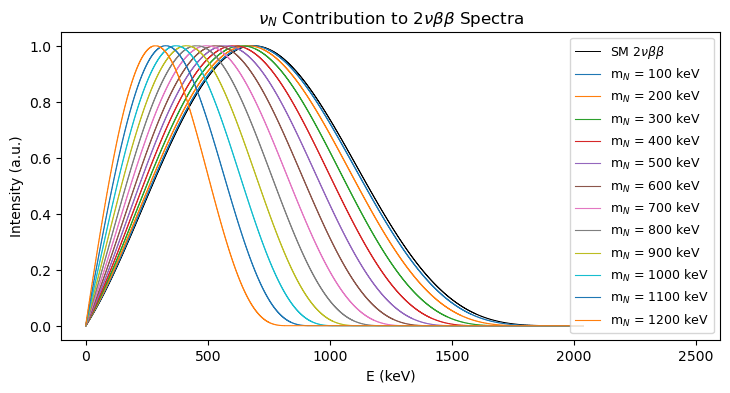

In [9]:
sterile_masses_keV = np.arange(100, 1300, 100)
lef_signal_dist    = []

for idx, sterile_mass_keV in enumerate(sterile_masses_keV):
    sdist = np.loadtxt((basepath + 'dist/sterile/76Ge_2vbb_mnu_{}_0_keV/76Ge_sums.txt'.format(sterile_mass_keV)), usecols=(2))
    sdist = np.insert(sdist, 0, 0, axis=0)
    sdist = sdist / np.sum(sdist)
    lef_signal_dist.append(sdist)

fig, ax = plt.subplots(figsize=(8.5, 4))
ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k', lw=0.7, ls='-', label=r'SM 2$\nu\beta\beta$')

for sdist, sterile_mass_keV in zip(lef_signal_dist, sterile_masses_keV):
    ax.step(bins, sdist/np.max(sdist), label=r'm$_{N}$ = ' + str(sterile_mass_keV) + ' keV', lw=0.8)

ax.set_xlim(-100, 2600)
ax.set_xlabel('E (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title(r'$\nu_N$ Contribution to 2$\nu\beta\beta$ Spectra')
ax.legend(fontsize=9)
plt.show()

# Sensitivity:

### L200 background data

In [10]:
data_path = '/Users/romoluque_c/LEGEND/2nbb_distortions/data_bckg_model/'

bckg_bins, tot_model = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_total_model.txt', usecols=(0,1), unpack=True, skiprows=1, delimiter=',')
alphas_model         = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_alphas.txt',      usecols=(1),   unpack=True, skiprows=1, delimiter=',')
co60_model           = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_Co60_chain.txt',  usecols=(1),   unpack=True, skiprows=1, delimiter=',')
k40_model            = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_K40_chain.txt',   usecols=(1),   unpack=True, skiprows=1, delimiter=',')
k42_model            = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_K42_chain.txt',   usecols=(1),   unpack=True, skiprows=1, delimiter=',')
vvBB_model           = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_Nvbb.txt',        usecols=(1),   unpack=True, skiprows=1, delimiter=',')
Th_model             = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_Th_chain.txt',    usecols=(1),   unpack=True, skiprows=1, delimiter=',')
U_model              = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_U_chain.txt',     usecols=(1),   unpack=True, skiprows=1, delimiter=',')
L200_actual_data     = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_fitted_data.txt', usecols=(1),   unpack=True, skiprows=1, delimiter=',')

# From Neutrino2024 talk
L200_data_exposure = 76.2 #kg * yr

######## Normalize by exposure
total_model      = tot_model        / L200_data_exposure
alphas_model     = alphas_model     / L200_data_exposure
co60_model       = co60_model       / L200_data_exposure
k40_model        = k40_model        / L200_data_exposure
k42_model        = k42_model        / L200_data_exposure
vvBB_model       = vvBB_model       / L200_data_exposure
Th_model         = Th_model         / L200_data_exposure
U_model          = U_model          / L200_data_exposure
L200_actual_data = L200_actual_data / L200_data_exposure

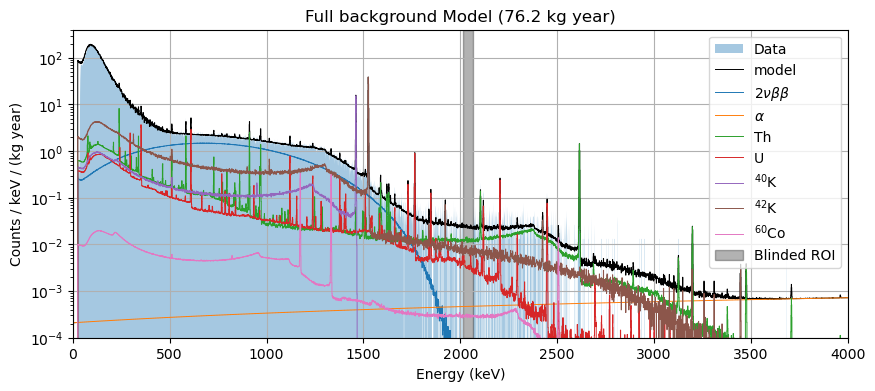

In [11]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.fill_between(bckg_bins, 0, L200_actual_data, label=r'Data', alpha=0.4)
#ax.step(bckg_bins, L200_actual_data, label=r'Data', alpha=0.3)
ax.step(bckg_bins, total_model,  where='post', lw=0.7, label='model', color='black')
ax.step(bckg_bins, vvBB_model,   where='post', lw=0.7, label=r'$2\nu\beta\beta$')
ax.step(bckg_bins, alphas_model, where='post', lw=0.7, label=r'$\alpha$')
ax.step(bckg_bins, Th_model,     where='post', lw=0.7, label=r'Th')
ax.step(bckg_bins, U_model,      where='post', lw=0.7, label=r'U')
ax.step(bckg_bins, k40_model,    where='post', lw=0.7, label=r'$^{40}$K')
ax.step(bckg_bins, k42_model,    where='post', lw=0.7, label=r'$^{42}$K')
ax.step(bckg_bins, co60_model,   where='post', lw=0.7, label=r'$^{60}$Co')

# Shade blinded ROI
qbb      = 2039 # keV
roi_ampl =   50 # keV
ax.axvspan(qbb - roi_ampl/2, qbb + roi_ampl/2, label=r'Blinded ROI', alpha=0.3, color='black')
ax.legend(loc='upper right')
ax.set_yscale('log')
ax.set_title(f'Full background Model ({L200_data_exposure} kg year)')
ax.set_ylabel('Counts / keV / (kg year)')
ax.set_xlabel('Energy (keV)')
ax.set_ylim(1e-4, 4e2)
ax.set_xlim(0, 4000)
ax.grid()
plt.show()

## Spectrum subtracting 2nbb:

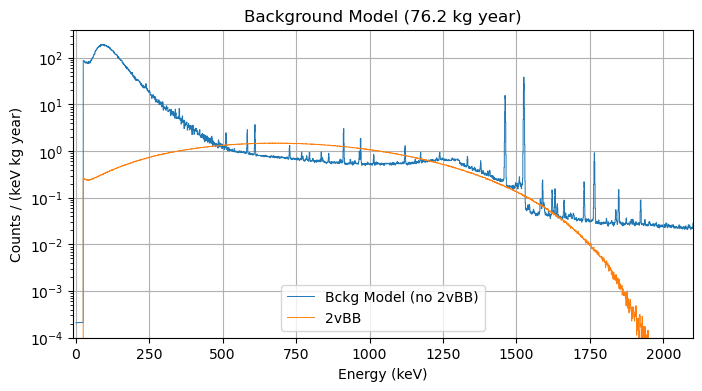

In [12]:
bckg_model = (total_model - vvBB_model)

fig, ax = plt.subplots(figsize=(8, 4))
ax.step(bckg_bins, bckg_model, where='post', lw=0.7, label='Bckg Model (no 2vBB)')
ax.step(bckg_bins, vvBB_model, where='post', lw=0.7, label='2vBB')
ax.set_yscale('log')
ax.set_ylim(1e-4, 4e2)
ax.set_title(f'Background Model ({L200_data_exposure} kg year)')
ax.set_ylabel("Counts / (keV kg year)")
ax.set_xlabel('Energy (keV)')
ax.set_xlim(-10, 2100)
ax.grid()
ax.legend()
plt.show()

## Sterile neutrinos

In [13]:
sterile_masses_keV     = np.arange(100, 1300, 100)
full_spec_phasesp_rats = []
lef_signal_dist        = []

# Reference spectrum to calculate phase space ratios
phasesp_ref_nnbb_dist = np.loadtxt(basepath + 'dist/sterile/76Ge_2vbb_mnu_0_0_keV/76Ge_sums.txt', usecols=(2), unpack=True)
phasesp_ref_nnbb_dist = phasesp_ref_nnbb_dist / np.sum(phasesp_ref_nnbb_dist) # Normalize to unit area

for idx, sterile_mass_keV in enumerate(sterile_masses_keV):
    sdist = np.loadtxt((basepath + 'dist/sterile/76Ge_2vbb_mnu_{}_0_keV/76Ge_sums.txt'.format(sterile_mass_keV)), usecols=(2))
    sdist = np.insert(sdist, 0, 0, axis=0)
    sdist = sdist / np.sum(sdist)

    lef_signal_dist       .append(sdist)
    full_spec_phasesp_rats.append(np.sum(sdist) / np.sum(phasesp_ref_nnbb_dist))

In [18]:
# Significance Level
alpha = 0.1

# Fit range left endpoints min and max inclusive [min, max]
min_bin = 0
max_bin = 2039

# Cut the distribution in the fit range
limits  = (min_bin, max_bin+1)
binning = max_bin + 1 - min_bin

# Input for fitting loop
labels       = ['m_N_'      + str(sterile_mass_keV) + '_keV' for sterile_mass_keV in sterile_masses_keV]
labels_fancy = [r'm$_N$ = ' + str(sterile_mass_keV) + ' keV' for sterile_mass_keV in sterile_masses_keV]
#sin_theta_sq_max_list = [0.015,0.006,0.004,0.004,0.003,0.004,0.006,0.008,0.015,0.025,0.04,0.1]
sin_theta_sq_max_list = [0.05 for _ in range(len(sterile_masses_keV))]

bckg_model_fitrange = bckg_model[min_bin:max_bin + 1]
vvBB_model_fitrange = vvBB_model[min_bin:max_bin + 1]

# Calculate the number of bckg and 2vBB events
exposure = L200_data_exposure
Nbckg    = exposure * np.sum(bckg_model_fitrange)
NvvBB    = exposure * np.sum(vvBB_model_fitrange)

# ===========================================================================

# Setup zfit values
obs = zfit.Space('E', limits=limits, binning=binning)

# Number of background NON-2vBB events. 2vBB events are special in this analysis
n_bckg         = zfit.Parameter('n_bckg', Nbckg, 0, step_size=0.01)
bckg_model_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=bckg_model_fitrange), extended=n_bckg)

def calculate_n_vvBB(sin_theta_sq, n_vvBB_theta_0):
    return (1 - sin_theta_sq) * (1 - sin_theta_sq) * n_vvBB_theta_0

def calculate_n_vNBB(sin_theta_sq, n_vvBB_theta_0, phasespace_ratio):
    return 2 * (1 - sin_theta_sq) * sin_theta_sq * n_vvBB_theta_0 * phasespace_ratio

# How many 2vBB events there would be at 0 mixing angle
n_vvBB_theta_0 = zfit.Parameter('n_vvBB_theta_0', NvvBB, lower=0, step_size=0.01)
sin_theta_sq   = zfit.Parameter(  'sin_theta_sq',     0, lower=0, step_size=0.01)

# Setup vvBB distribution with calculated counts
n_vvBB   = zfit.ComposedParameter('n_vvBB', calculate_n_vvBB, params=[sin_theta_sq, n_vvBB_theta_0])
vvBB_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=vvBB_model_fitrange), extended = n_vvBB)

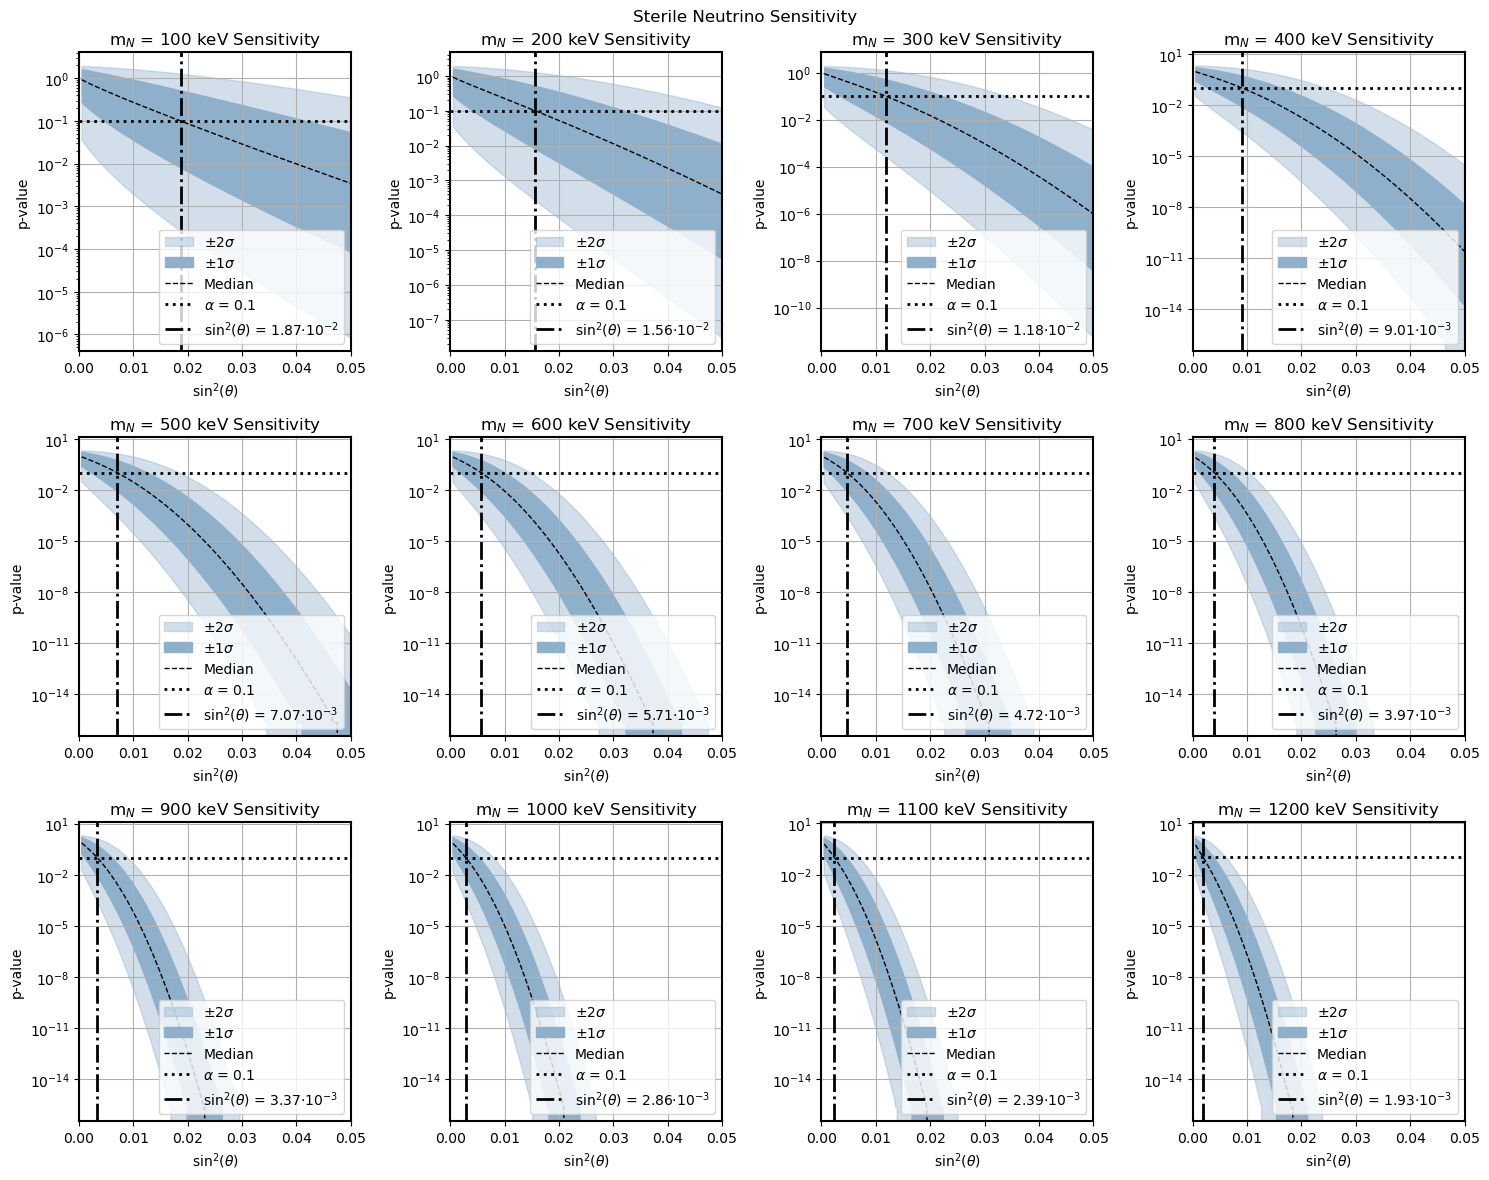

In [19]:
# Prepare combined graph
n_rows      = 3
n_columns   = len(lef_signal_dist) // n_rows
combined_fig, combined_ax = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(15, 12))
combined_ax = combined_ax.flatten()

combined_fig.suptitle('Sterile Neutrino Sensitivity')

all_sin_theta_sq_sens = []
for idx, (lab, lab_fancy, sterile_mass_keV, sig_dist, sin_theta_sq_max, full_spec_phasesp_rat) in enumerate(zip(labels, labels_fancy, sterile_masses_keV, lef_signal_dist, sin_theta_sq_max_list, full_spec_phasesp_rats)):

    if idx > 20:
        continue
    if 2039 - sterile_mass_keV < min_bin: # First check that the endpoint is in the fit range
        continue

    sig_dist_fitrange     = sig_dist[min_bin:max_bin + 1]
    part_spec_phasesp_rat = full_spec_phasesp_rat * np.sum(sig_dist_fitrange)
    
    n_vNBB   = zfit.ComposedParameter('n_vNBB', calculate_n_vNBB, params=[sin_theta_sq, n_vvBB_theta_0, part_spec_phasesp_rat])
    vNBB_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_vNBB)
    
    # Model (vvBB + vNBB + background)
    # Since both signal_pdf and background_model_pdf are extended PDF's we should not specify the fraction of each PDF
    model = zfit.pdf.BinnedSumPDF([vvBB_pdf, vNBB_pdf, bckg_model_pdf])

    sin_theta_sq  .set_value(0)
    n_vvBB_theta_0.set_value(NvvBB)
    n_bckg        .set_value(Nbckg)

    real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))
    # In theory the 'subtr_const': True should offset the loss function closer to 0. In practice the opposite is true.
    # After perusing the source code (https://zfit.readthedocs.io/en/v0.18.1/_modules/zfit/core/loss.html)
    # I see zfit is calculating `log_offset = (NLL - 10000) / nEventsTot` which is completely bogus for a binned fit
    # zfit should be using `log_offset = NLL / binning` because binning is the amount of bins we are actually fitting
    # In fact the loss function L is defined (https://zfit.readthedocs.io/en/stable/user_api/_generated/loss/zfit.loss.ExtendedBinnedNLL.html#extendedbinnednll)
    # as a product over the bins, so NLL will be O(binning) and not O(nEventsTot). So the calculated log_offset is bogus - Lars, June 24, 2024
    # nll = zfit.loss.ExtendedBinnedNLL(model, zfit.data.BinnedData.from_tensor(space=obs, values=model.counts()), options = {'subtr_const' : False})
    nll       = zfit.loss    .ExtendedBinnedNLL(model, real_data, options={'subtr_const': False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    # Perturb n_signal away from 0 to get out of a local minimum at 0
    # Even when n_signal for the fake_data != 0 the fitting gets stuck there for some reason
    # This only happens sometimes, and more often when I don't bound n_signal, n_bckg > 0
    sin_theta_sq  .set_value(0.001)
    n_vvBB_theta_0.set_value(NvvBB)
    n_bckg        .set_value(Nbckg)

    result = minimizer.minimize(nll)
    result.hesse(name='hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)
    
    # https://hepstats.readthedocs.io/en/v0.6.1/getting_started/hypotests.html - Lars
    sin_theta_sq_hypot_vals = np.linspace(sin_theta_sq_max / 100., sin_theta_sq_max, 200)
    
    poialt   = POI(sin_theta_sq, 0) # Background only
    poinull  = POIarray(sin_theta_sq, sin_theta_sq_hypot_vals) # Background + signal
    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2], onesided=False)
    
    sin_theta_sq_sens = find_zero_crossing(sin_theta_sq_hypot_vals, expected[0] - alpha)[0]
    all_sin_theta_sq_sens.append(sin_theta_sq_sens)

    # Plot result on both individual and combined plots
    fig, ax = plt.subplots()
    ax_to_plot = [ax, combined_ax[idx]]
    for ax in ax_to_plot:
        ax.fill_between(sin_theta_sq_hypot_vals, expected[3], expected[4], color='#8FB0CB', label=r'$\pm 2\sigma$', alpha=0.4)
        ax.fill_between(sin_theta_sq_hypot_vals, expected[1], expected[2], color='#8FB0CB', label=r'$\pm 1\sigma$')
        ax.plot(sin_theta_sq_hypot_vals, expected[0], c='black', lw=1, ls='dashed', label='Median')
        ax.axhline(alpha,             lw=2, ls='dotted',  color='black', label=r'$\alpha$ = ' + str(alpha))
        ax.axvline(sin_theta_sq_sens, lw=2, ls='dashdot', color='black', label=r'sin$^2(\theta)$ = ' + sci_notation(sin_theta_sq_sens, precision=2, decimal_digits=2))
        set_border_line_width(ax, 1.5)
        ax.set_title(lab_fancy + ' Sensitivity')
        ax.set_xlabel(r'sin$^2(\theta)$')
        ax.set_ylabel('p-value')
        #ax.set_xlim(min(sin_theta_sq_hypot_vals), max(sin_theta_sq_hypot_vals))
        #ax.set_xlim(sin_theta_sq_sens-0.02, sin_theta_sq_sens+0.02)
        ax.set_xlim(0, 0.05)
        ax.set_yscale('log')
        ax.legend(loc='lower right')
        ax.grid()
    #fig.savefig('./images/ICPCs/sterile_' + lab + '_ICPCs.pdf', bbox_inches='tight')
    plt.close(fig)

combined_fig.tight_layout()
#combined_fig.savefig('./images/ICPCs/sterile_combined_ICPCs.pdf', bbox_inches='tight')
plt.show()

Using background model: 


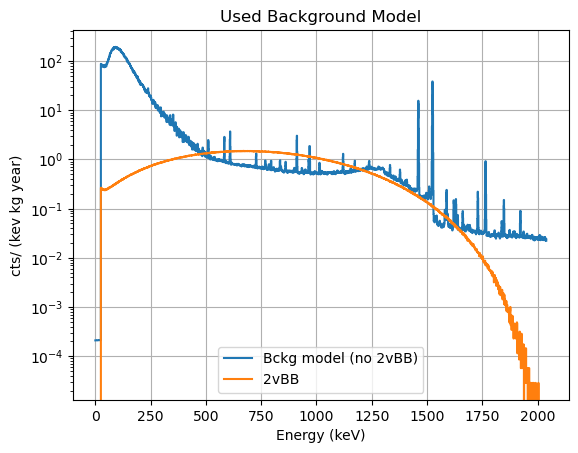

In [21]:
print('Using background model: ')
fig, ax = plt.subplots()
ax.step(bins, bckg_model[:len(bins)], where='post', label='Bckg model (no 2vBB)')
ax.step(bins, vvBB_model[:len(bins)], where='post', label='2vBB')
ax.set_title('Used Background Model')
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('cts/ (kev kg year)')
ax.grid()
ax.set_yscale('log')
ax.legend()
plt.show()

### Save data

In [25]:
actually_fit_masses = list(np.array(sterile_masses_keV)   [np.array(all_sin_theta_sq_sens) != np.array(None)])
actually_calc_sens  = list(np.array(all_sin_theta_sq_sens)[np.array(all_sin_theta_sq_sens) != np.array(None)])

### Save computed data
## filename = './results/sensitivity_sterile_LEGEND200_fit_0_2039.npz'
## np.savez(filename, masses=actually_fit_masses, sensitivity=actually_calc_sens)

In [27]:
all_sin_theta_sq_sens

[0.01867767974545866,
 0.01564254568412474,
 0.011829245549217559,
 0.00900808303365211,
 0.007073232649306751,
 0.00571285772014224,
 0.004721069762719924,
 0.003969058113321351,
 0.0033699502863709816,
 0.0028596243428993997,
 0.002390144323624537,
 0.001930137874793993]

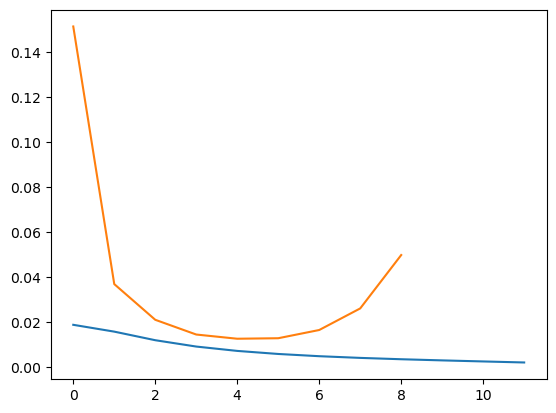

In [32]:
plt.plot(all_sin_theta_sq_sens)
plt.plot(limits_sterile_gerda)

## Exclusion plotting

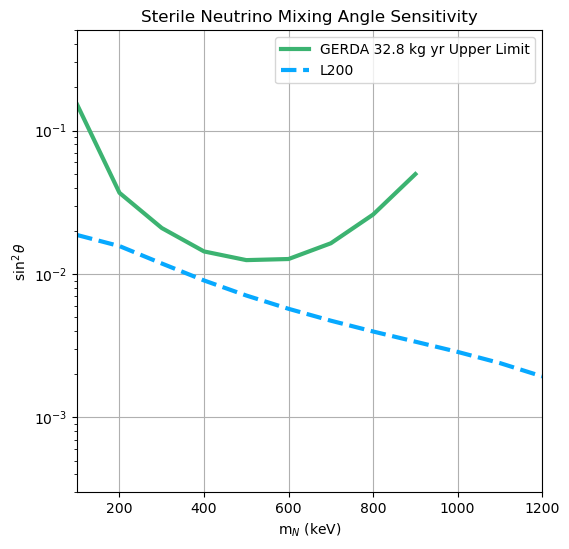

In [30]:
c_gerda   = 'mediumseagreen'
c_legend1 = '#07A9FF'
c_legend2 = '#1A2A5B'

fig, ax = plt.subplots(figsize=(6,6))

#GERDA 32.8 kg yr
data_sterile_gerda   = np.load(basepath+'/results/results_gerda2022_sterile_all.npz')
masses_sterile_gerda = data_sterile_gerda['masses']
limits_sterile_gerda = data_sterile_gerda['limits']

#LEGEND 200
#data_sterile_partial        = np.load('./results/sensitivity_sterile_LEGEND200_fit_0_2039.npz')
masses_sterile_partial      = actually_fit_masses #data_sterile_partial['masses']
sensitivity_sterile_partial = all_sin_theta_sq_sens #data_sterile_partial['sensitivity']

ax.plot(masses_sterile_gerda,   limits_sterile_gerda,        label='GERDA 32.8 kg yr Upper Limit', lw=3, color=c_gerda)
ax.plot(masses_sterile_partial, sensitivity_sterile_partial, label='L200', lw=3, color = c_legend1, ls='dashed')

ax.set_yscale('log')
ax.set_xlim(100,1200)
ax.set_ylim(3e-4,0.5)
ax.set_xlabel(r'm$_N$ (keV)')
ax.set_ylabel(r'$\sin^2\theta$')
ax.set_title('Sterile Neutrino Mixing Angle Sensitivity')
ax.grid()
ax.legend()

#plt.savefig('figs/LEGEND_1000_sensitivity_sterile-neutrinos.pdf', bbox_inches='tight')

plt.show()

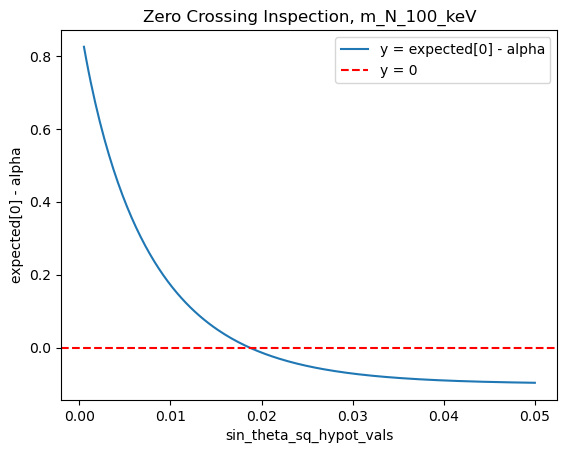

Zero Crossings: [0.01867768]


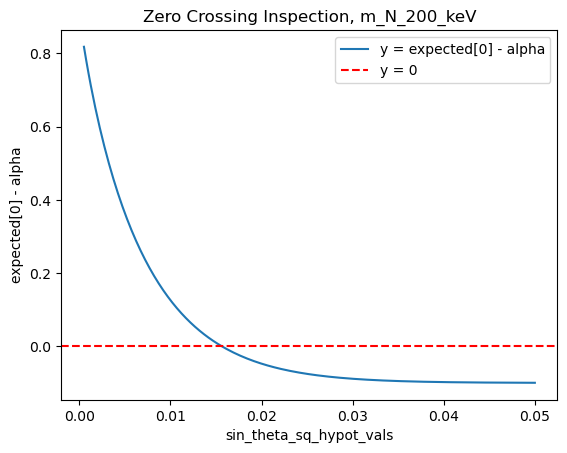

Zero Crossings: [0.01564255]


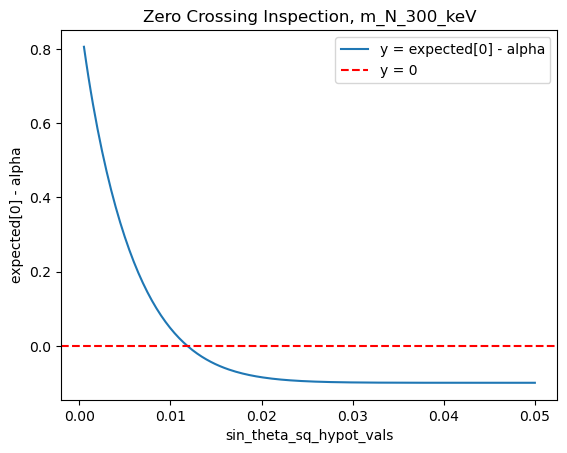

Zero Crossings: [0.01182925]


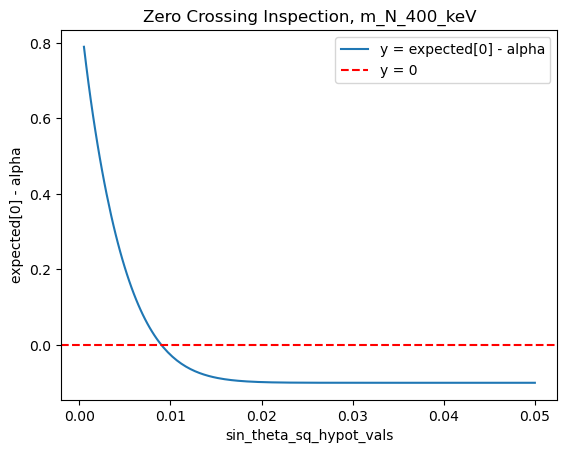

Zero Crossings: [0.00900808]


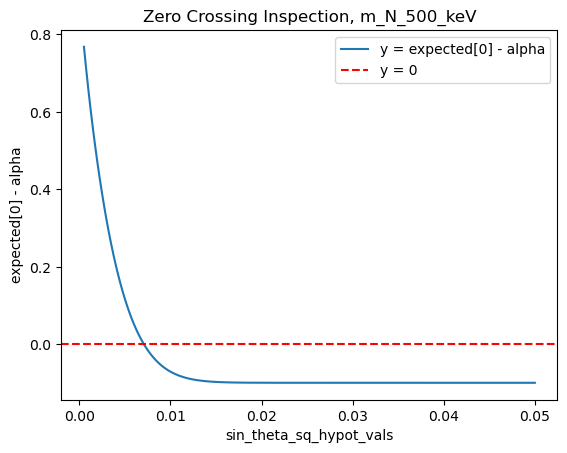

Zero Crossings: [0.00707323]


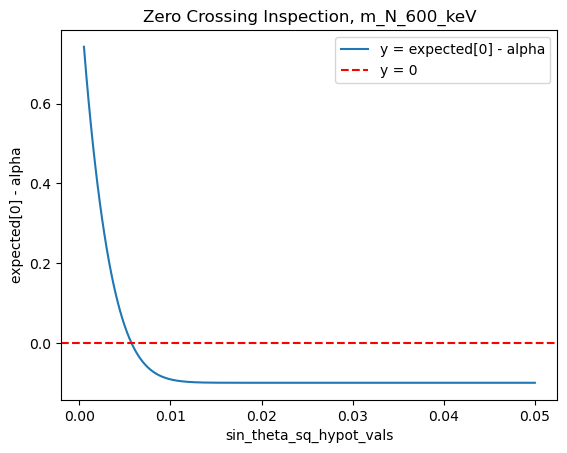

Zero Crossings: [0.00571286]


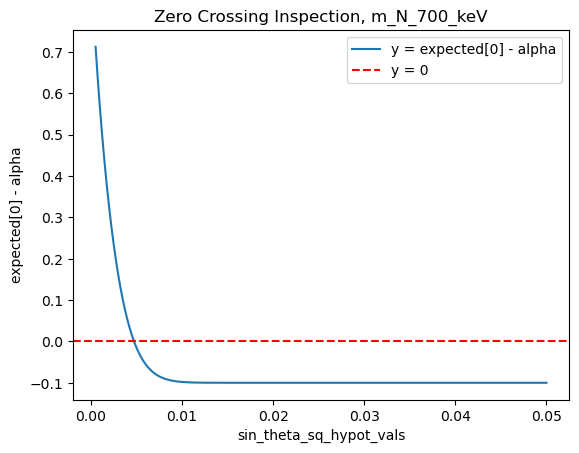

Zero Crossings: [0.00472107]


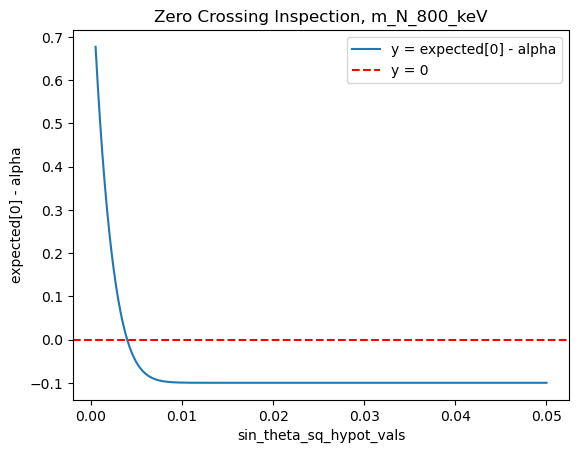

Zero Crossings: [0.00396906]


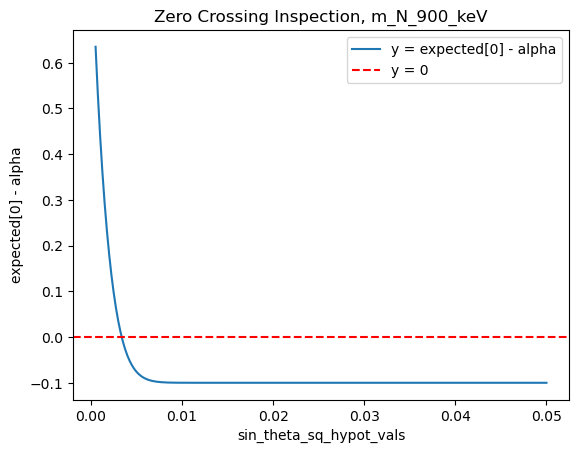

Zero Crossings: [0.00336995]


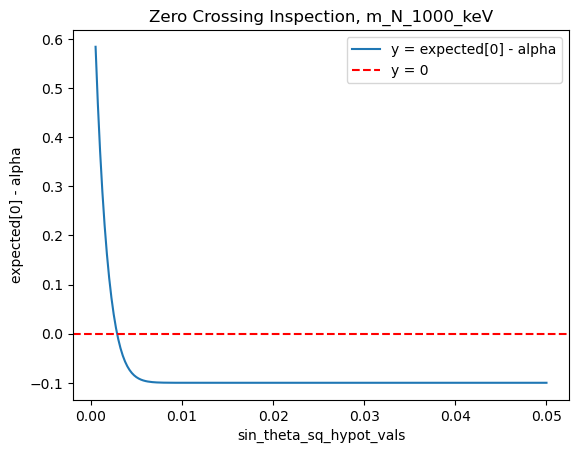

Zero Crossings: [0.00285962]


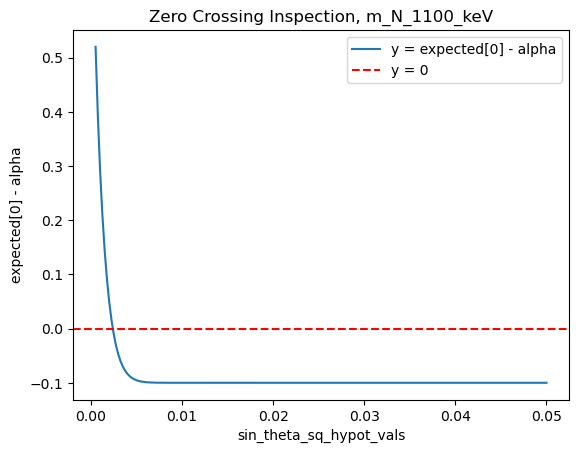

Zero Crossings: [0.00239014]


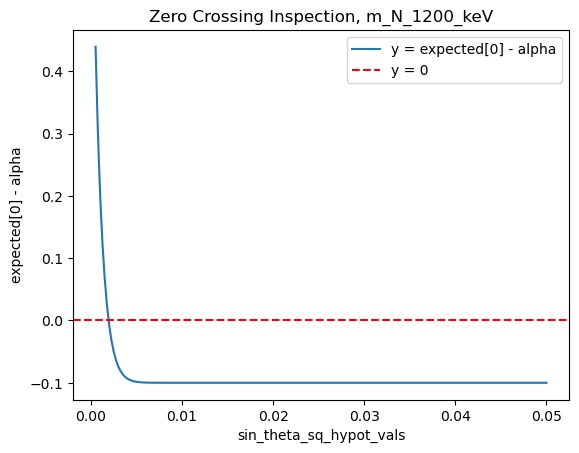

Zero Crossings: [0.00193014]


In [20]:
for idx, (lab, lab_fancy, sterile_mass_keV, sig_dist, sin_theta_sq_max, full_spec_phasesp_rat) in enumerate(zip(labels, labels_fancy, sterile_masses_keV, lef_signal_dist, sin_theta_sq_max_list, full_spec_phasesp_rats)):

    if 2039 - sterile_mass_keV < min_bin: # First check that the endpoint is in the fit range
        continue

    sig_dist_fitrange     = sig_dist[min_bin:max_bin + 1]
    part_spec_phasesp_rat = full_spec_phasesp_rat * np.sum(sig_dist_fitrange)
    
    n_vNBB   = zfit.ComposedParameter('n_vNBB', calculate_n_vNBB, params=[sin_theta_sq, n_vvBB_theta_0, part_spec_phasesp_rat])
    vNBB_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_vNBB)
    
    model = zfit.pdf.BinnedSumPDF([vvBB_pdf, vNBB_pdf, bckg_model_pdf])

    sin_theta_sq  .set_value(0)
    n_vvBB_theta_0.set_value(NvvBB)
    n_bckg        .set_value(Nbckg)

    real_data = zfit.data    .BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))
    nll       = zfit.loss    .ExtendedBinnedNLL(model, real_data, options={'subtr_const': False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    sin_theta_sq  .set_value(0.001)
    n_vvBB_theta_0.set_value(NvvBB)
    n_bckg        .set_value(Nbckg)

    result = minimizer.minimize(nll)
    result.hesse(name='hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)
    
    sin_theta_sq_hypot_vals = np.linspace(sin_theta_sq_max / 100., sin_theta_sq_max, 200)
    
    poialt   = POI(sin_theta_sq, 0) # Background only
    poinull  = POIarray(sin_theta_sq, sin_theta_sq_hypot_vals) # Background + signal
    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2], onesided=False)
    
    plt.plot(sin_theta_sq_hypot_vals, expected[0] - alpha, label='y = expected[0] - alpha')
    plt.axhline(0, color='red', linestyle='--', label='y = 0')
    plt.xlabel('sin_theta_sq_hypot_vals')
    plt.ylabel('expected[0] - alpha')
    plt.title(f'Zero Crossing Inspection, {lab}')
    plt.legend()
    plt.show()
    
    zero_crossings = find_zero_crossing(sin_theta_sq_hypot_vals, expected[0] - alpha)
    print("Zero Crossings:", zero_crossings)